In [1]:
%matplotlib inline
# %matplotlib qt
# import mpld3
# mpld3.enable_notebook() # seems to just freeze the stuff a bit
# import matplotlib
# matplotlib.use('nbagg') # also slow AF

In [2]:
from __future__ import print_function, division
import os, sys
import numpy as np, scipy as sp, pandas as pd
import scipy.io
import scipy.signal as signal
import scipy.fftpack as ftpk
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [3]:
e = np.exp(1)
pi = np.pi
pii = np.pi*1j
twopi = np.pi * 2

In [4]:
import pywt
import pyhht
import pyhht.emd

In [5]:
from imp import reload
import auxfilter
import glob

In [6]:
# os.chdir('..')
os.chdir('/home/mike/venvs/ml/ml/py')
print(os.getcwd())
from eegkaggle.vectorizers import naive, spectral
from eegkaggle.dio import dataio
from eegkaggle.plotting import plotstuff
from eegkaggle.msignal import wavelets, metrics

/home/mike/venvs/ml/ml/py


In [7]:
reload(plotstuff)
reload(dataio)
reload(spectral)

<module 'eegkaggle.vectorizers.spectral' from 'eegkaggle/vectorizers/spectral.pyc'>

In [8]:
matplotlib.style.use('ggplot')
colors = ['k', 'r', 'g', 'b', 'm', 'y', 'c']


In [9]:
ssmall,smed, slarge, slong = (4,3), (8,6), (16,12), (16,4)
matplotlib.rcParams['figure.figsize'] = slarge

Functions

In [10]:
basepath = '/home/mike/Downloads/train_1/'
sources1 = glob.glob(basepath + '*_1.mat') 
sources0 = glob.glob(basepath + '*_0.mat') 

basepathT = '/media/mike/Elements/data/kaggle/melbourne/test_3/'
basepathT = '/home/mike/Downloads/test_1_new/'

sourcesT = glob.glob(basepath + '*.mat') 


In [11]:
# data = pd.read_csv('/home/mike/Downloads/test_new/submit_1478483249.67.csv')
data = pd.read_csv('/media/mike/Elements/data/kaggle/melbourne/train_all/submit_1478496675.38.csv')

# data[['hurst', 'chanstd']] = normalize(data[['hurst', 'chanstd']] ,axis=0)
labels = [name[-5] for name in data['File']]
setnum = [name[0] for name in data['File']]
data['label'] = pd.to_numeric(pd.Series(labels))
data['set'] = pd.to_numeric(pd.Series(setnum))
data.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class,label,set
0,0,0.642937,28.582705,0.064319,0.323870,1_1000_0.mat,0,0,1
1,1,0.606083,28.408329,0.073427,0.323376,1_1001_0.mat,0,0,1
2,2,0.653069,24.988890,0.045110,0.326239,1_1002_0.mat,0,0,1
3,3,0.636142,34.573742,0.213256,0.351062,1_1003_0.mat,0,0,1
4,4,0.611702,30.189907,0.177274,0.342525,1_1004_0.mat,0,0,1


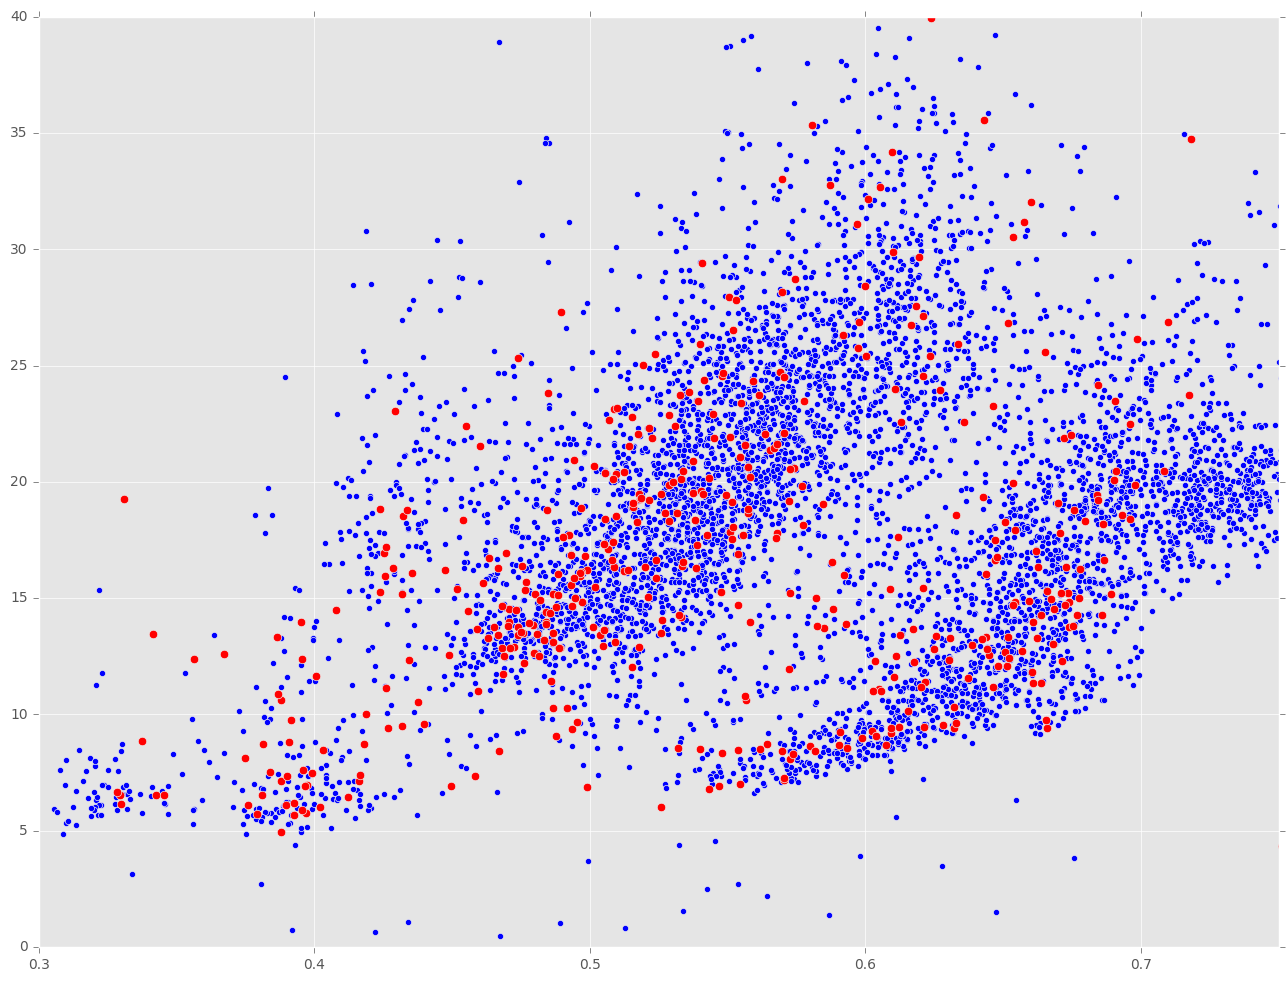

In [12]:
d0 = data[data['label'] == 0]
d1 = data[data['label'] == 1]
plt.scatter(d0['hurst'], d0['chanstd'])
plt.scatter(d1['hurst'], d1['chanstd'], c='r', marker='.', s=150)
x = np.linspace(0.3,.7, 10)
plt.xlim([.3,.75])
plt.ylim([0, 40])
y = -40*x + 40
# plt.plot(x, y)

In [13]:
print(np.corrcoef(data[['hurst', 'chanstd', 'ccmean', 'ccstd']],rowvar=0))

[[ 1.          0.38462533 -0.1782399   0.67211227]
 [ 0.38462533  1.          0.36448607  0.49350022]
 [-0.1782399   0.36448607  1.          0.18243074]
 [ 0.67211227  0.49350022  0.18243074  1.        ]]


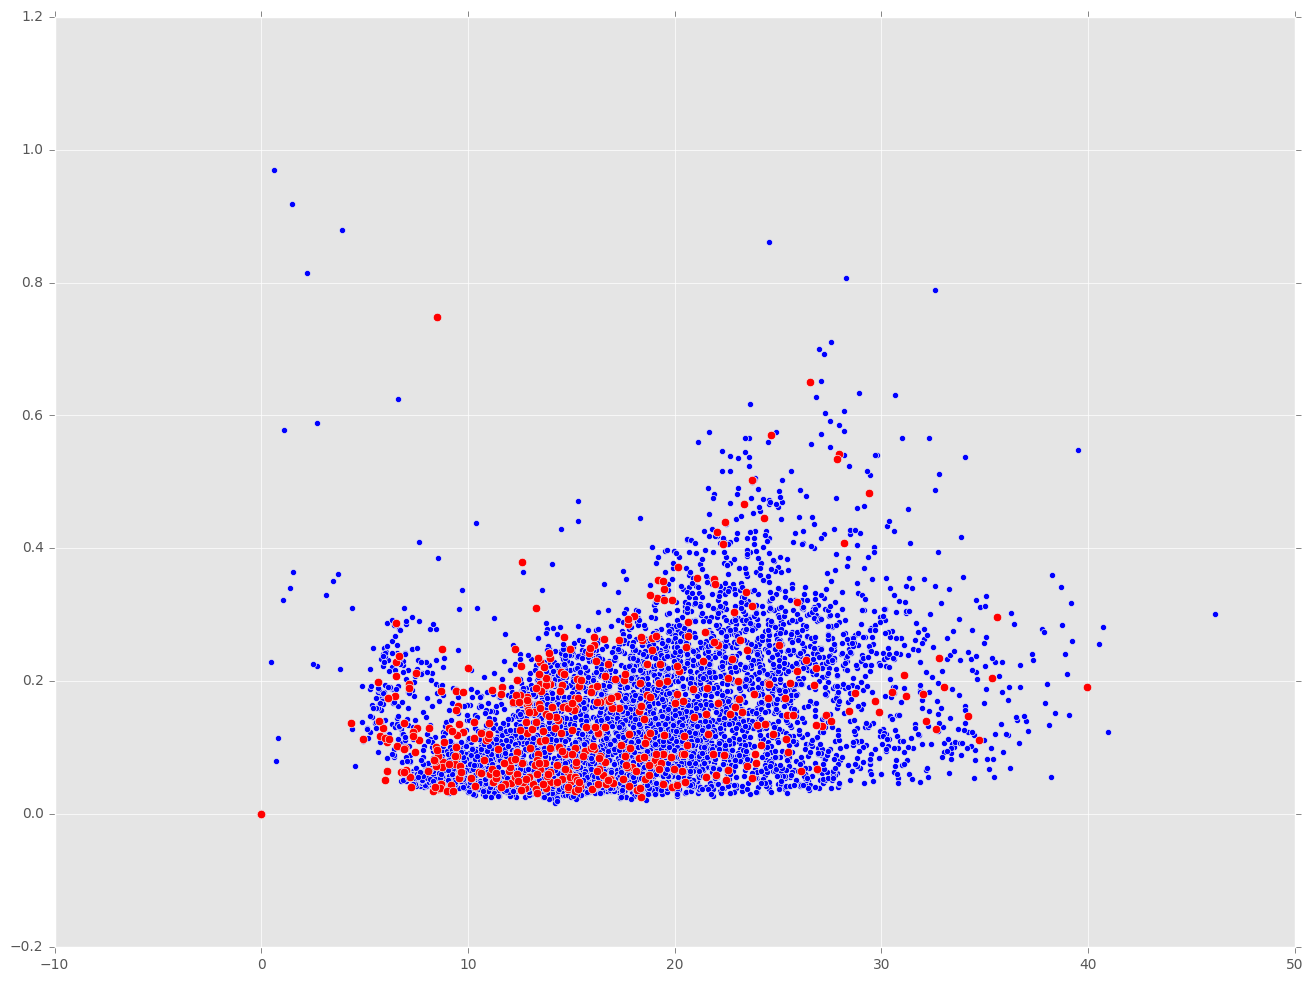

In [14]:
x = 'chanstd'
y = 'ccmean'
plt.scatter(d0[x], d0[y])
plt.scatter(d1[x], d1[y], c='r', marker='.', s=150)

In [15]:
clf = svm.SVC()
x = data[['hurst', 'chanstd', 'ccmean', 'ccstd']].as_matrix()
y = data['label'].as_matrix()

### Train SVM

In [16]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
vec = x[1]
clf.predict(vec.reshape(1,-1))

array([0])

In [18]:
guess =[]
for i in range(len(data)):
    vec = x[i].reshape(1,-1)
    ans = clf.predict(vec)
    guess.append(ans)
    

In [19]:
data['guess'] = pd.Series(guess)

In [20]:
score = data['label'] == data['guess']
score.mean()

0.92567455719251779

# Woah! Probably overfitting. but nice score.

In [21]:
# data = pd.read_csv('/home/mike/Downloads/test_new/submit_1478483249.67.csv')
datatest = pd.read_csv('/home/mike/Downloads/test_new/submit_1478497925.88.csv')
setnum = [name[4] for name in datatest['File']]
datatest['set'] = pd.Series(setnum)
datatest['set'] = pd.to_numeric(datatest['set'])
datatest.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class,set
0,0,0.543553,15.974331,0.141321,0.290573,new_2_907.mat,1,2
1,1,0.599508,10.851130,0.083844,0.300162,new_3_521.mat,1,3
2,2,0.555639,20.826307,0.277197,0.307219,new_2_435.mat,0,2
3,3,0.721421,20.126127,0.084893,0.333722,new_3_245.mat,0,3
4,4,0.585319,17.870054,0.172700,0.347513,new_1_23.mat,0,1


In [22]:
datatest['File'][0][4]

'2'

In [23]:
x = data[['hurst', 'chanstd', 'ccmean', 'ccstd']].as_matrix()


In [24]:
guess =[]
for i in range(len(data)):
    vec = x[i].reshape(1,-1)
    ans = clf.predict(vec)
    guess.append(ans[0])

In [25]:
datatest['guess'] = pd.Series(guess)
datatest.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class,set,guess
0,0,0.543553,15.974331,0.141321,0.290573,new_2_907.mat,1,2,0
1,1,0.599508,10.851130,0.083844,0.300162,new_3_521.mat,1,3,0
2,2,0.555639,20.826307,0.277197,0.307219,new_2_435.mat,0,2,0
3,3,0.721421,20.126127,0.084893,0.333722,new_3_245.mat,0,3,0
4,4,0.585319,17.870054,0.172700,0.347513,new_1_23.mat,0,1,0


In [26]:
datatest.to_csv('/home/mike/kaggle/melbourne/svm001.csv')

In [27]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data[['hurst', 'chanstd']])

In [28]:
data['km'] = pd.Series(kmeans.labels_)

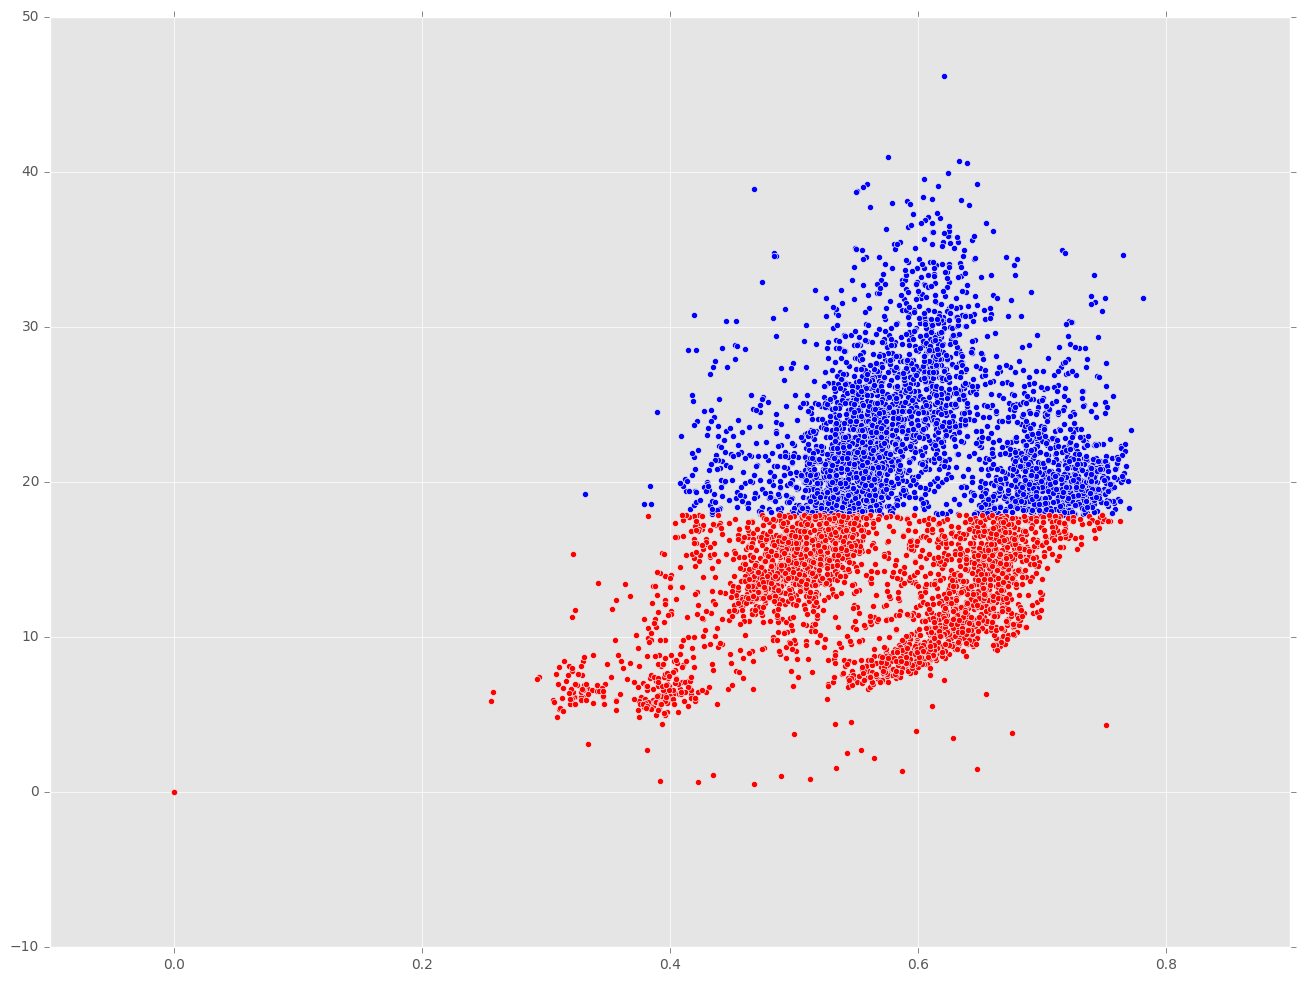

In [29]:
d0 = data[data['km'] == 0]
d1 = data[data['km'] == 1]
d2 = data[data['km'] == 2]

plt.scatter(d0['hurst'], d0['chanstd'])
plt.scatter(d1['hurst'], d1['chanstd'], c='r')
plt.scatter(d2['hurst'], d2['chanstd'], c='c')

In [30]:
score = data['km'] == data['label']
score.mean()

0.55653037576560171

In [31]:
# data = pd.read_csv('/home/mike/Downloads/test_new/submit_1478483249.67.csv')
# data[['hurst', 'chanstd']] = normalize(data[['hurst', 'chanstd']] ,axis=0)
datatest = pd.read_csv('/home/mike/Downloads/test_new/submit_1478497925.88.csv')
setnum = [name[4] for name in datatest['File']]
datatest['set'] = pd.Series(setnum)
datatest['set'] = pd.to_numeric(datatest['set'])
datatest.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class,set
0,0,0.543553,15.974331,0.141321,0.290573,new_2_907.mat,1,2
1,1,0.599508,10.851130,0.083844,0.300162,new_3_521.mat,1,3
2,2,0.555639,20.826307,0.277197,0.307219,new_2_435.mat,0,2
3,3,0.721421,20.126127,0.084893,0.333722,new_3_245.mat,0,3
4,4,0.585319,17.870054,0.172700,0.347513,new_1_23.mat,0,1


(0, 40)

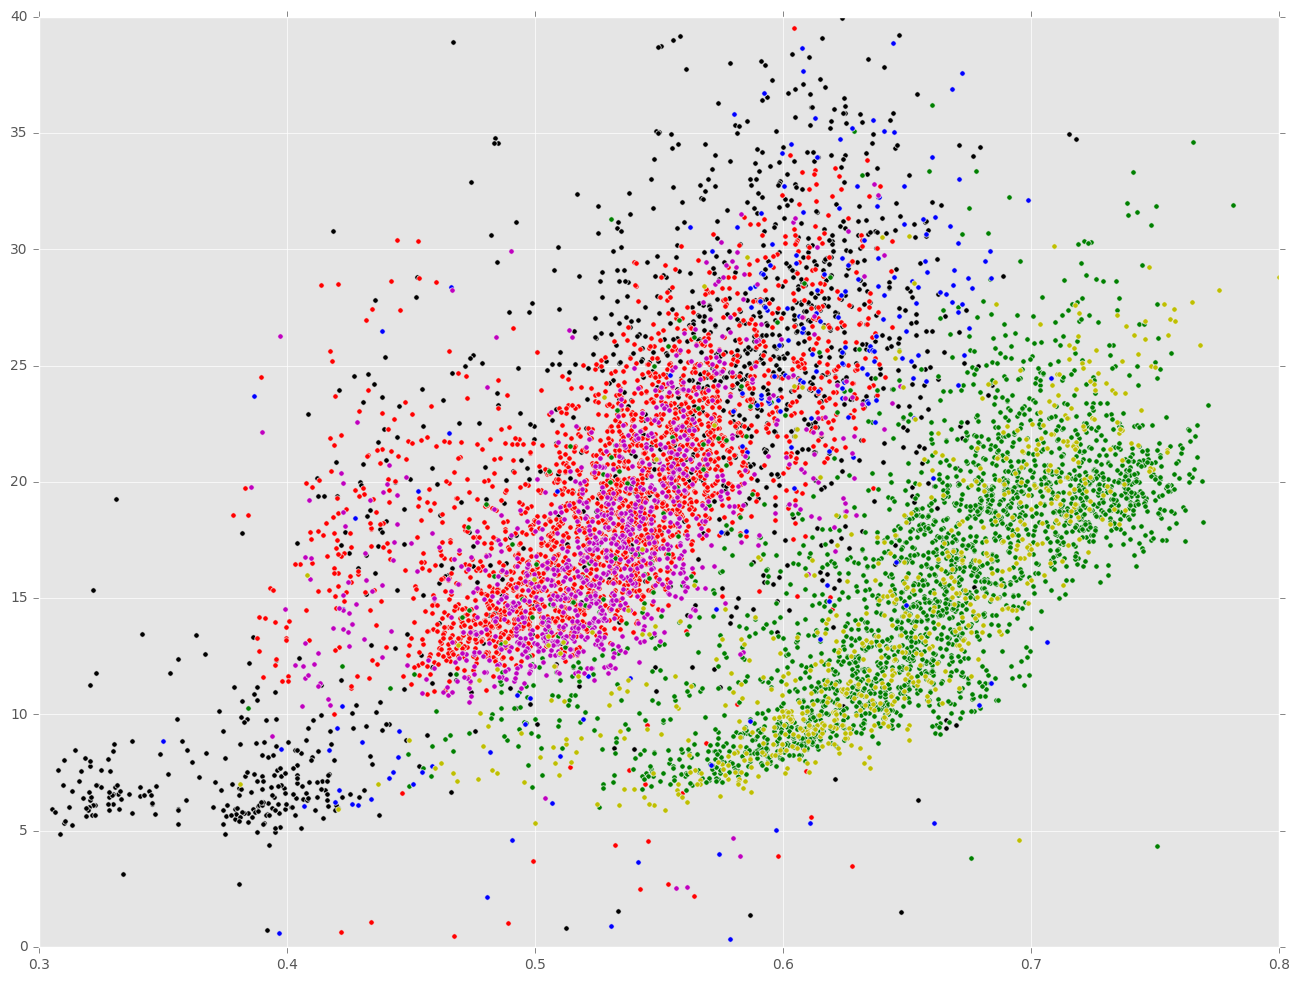

In [32]:
dx = []
marksize = 15
for n in range(0,4):
    dx.append(data[data['set'] == n])
    plt.scatter(dx[n]['hurst'], dx[n]['chanstd'], c=colors[n-1], s=marksize)

dxt = []
for n in range(0,4):
    dxt.append(datatest[datatest['set'] == n])
    plt.scatter(dxt[n]['hurst'], dxt[n]['chanstd'], c=colors[n+2], s=marksize)
    
plt.xlim(.3,.8)
plt.ylim(0,40)
 

(0, 40)

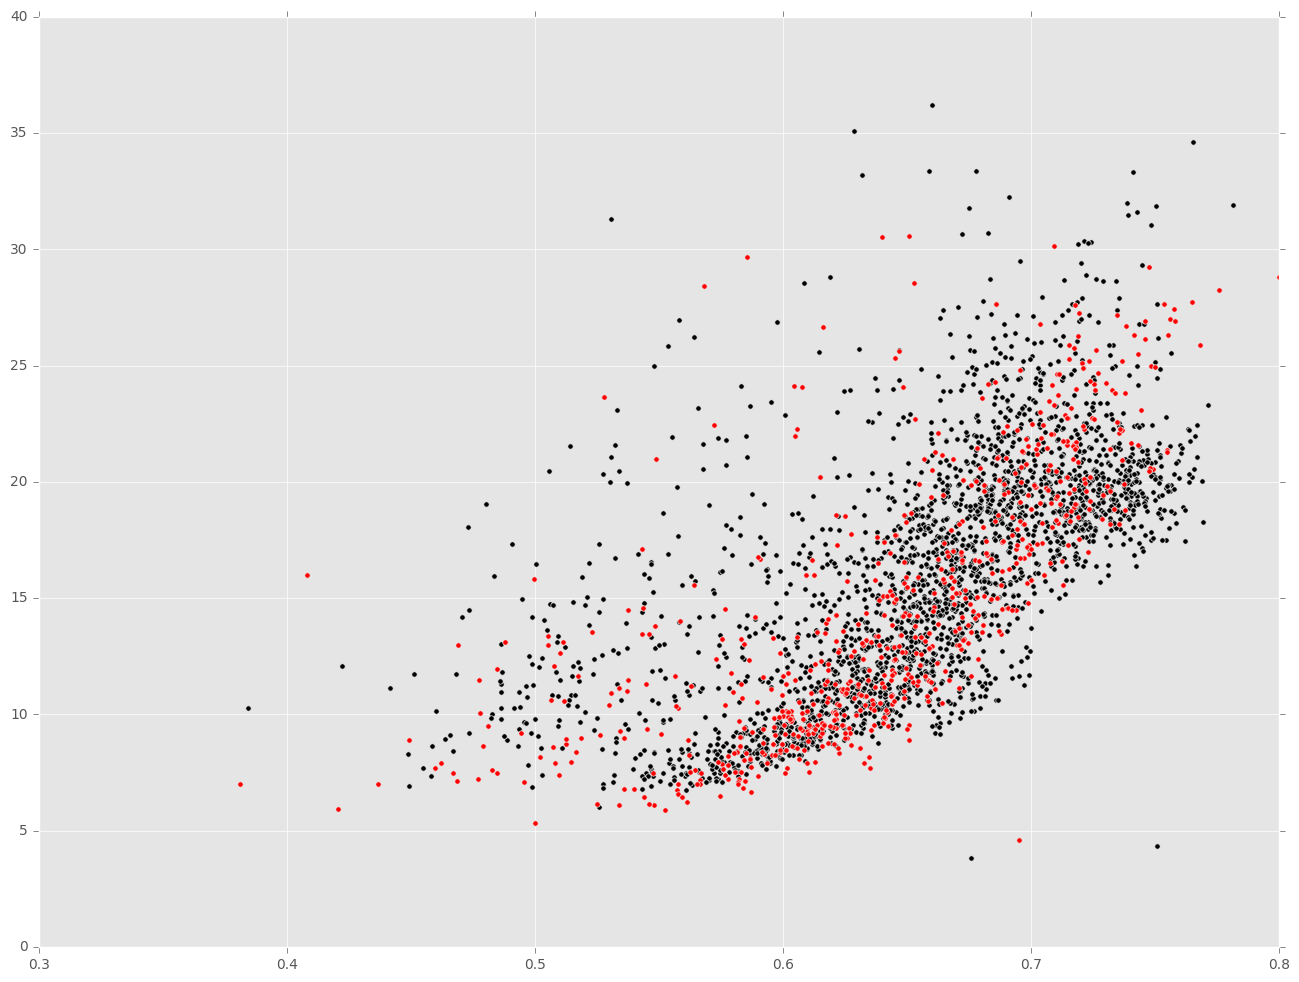

In [33]:
n = 3
plt.scatter(dx[n]['hurst'], dx[n]['chanstd'], c='k', s=marksize)
plt.scatter(dxt[n]['hurst'], dxt[n]['chanstd'], c='r', s=marksize)
plt.xlim(.3,.8)
plt.ylim(0,40)

In [34]:
clf_set = svm.SVC() # poly is really slow!
x = data[['hurst', 'chanstd']].as_matrix()
y = data['set'] == 3
y = y.as_matrix()

In [35]:
clf_set.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
vec = x[1]
clf_set.predict(vec.reshape(1,-1))

array([False], dtype=bool)

In [37]:
guess =[]
for i in range(len(data)):
    vec = x[i].reshape(1,-1)
    ans = clf_set.predict(vec)
    guess.append(ans[0])

In [38]:
datatest['guess_set'] = pd.Series(guess)
datatest.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class,set,guess_set
0,0,0.543553,15.974331,0.141321,0.290573,new_2_907.mat,1,2,False
1,1,0.599508,10.851130,0.083844,0.300162,new_3_521.mat,1,3,False
2,2,0.555639,20.826307,0.277197,0.307219,new_2_435.mat,0,2,False
3,3,0.721421,20.126127,0.084893,0.333722,new_3_245.mat,0,3,False
4,4,0.585319,17.870054,0.172700,0.347513,new_1_23.mat,0,1,False


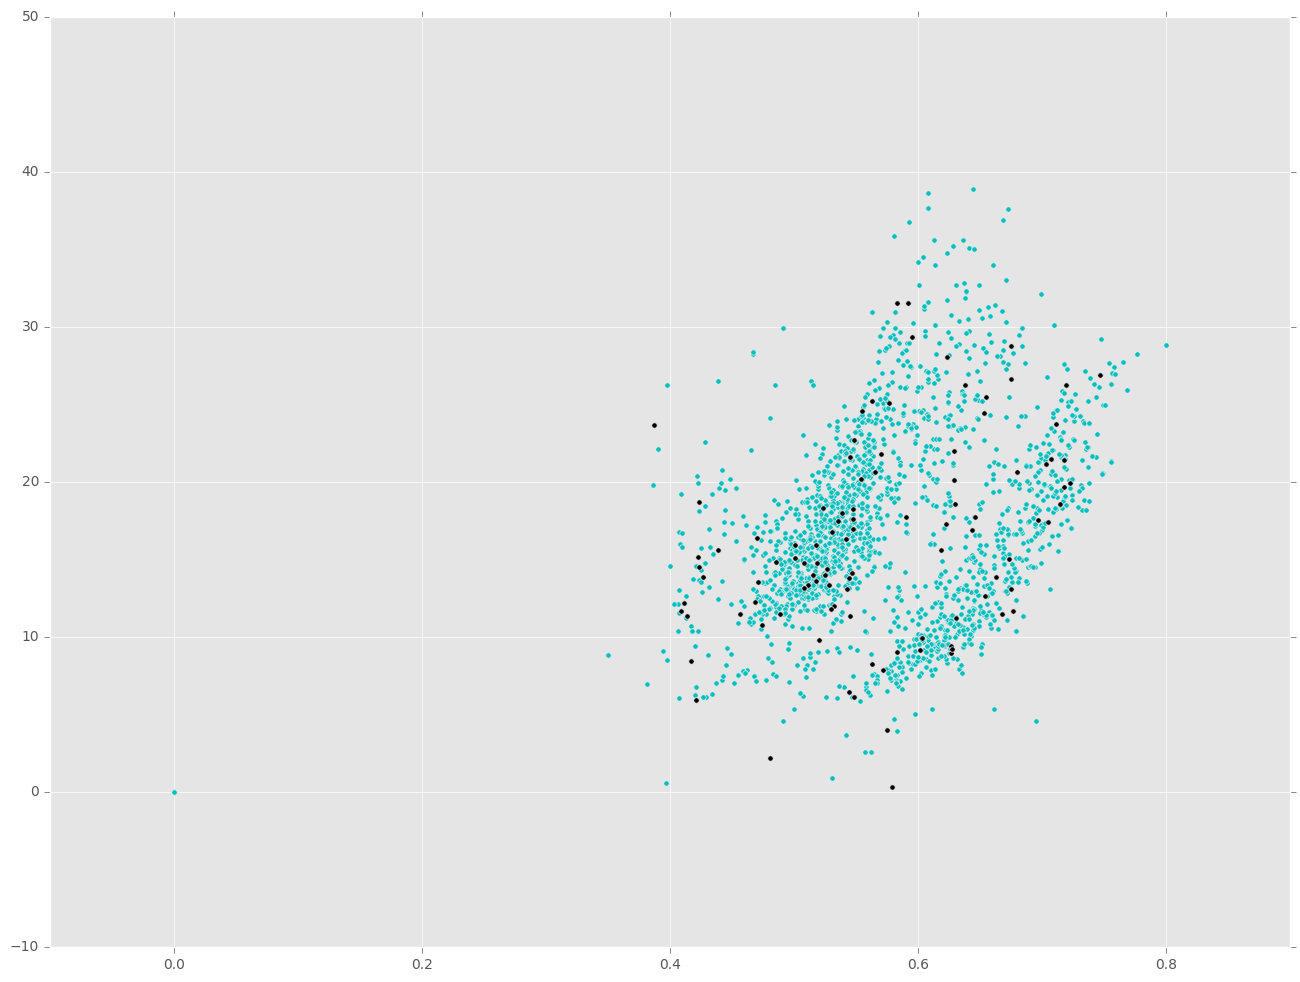

In [39]:
dxt = []
marksize = 15
for n in range(0,4):
    dxt.append(datatest[datatest['guess_set'] == n])
    plt.scatter(dxt[n]['hurst'], dxt[n]['chanstd'], c=colors[n-1], s=marksize)

## Well, that didn't work  with 3 labels :( trying 2 now (overwrite)

In [40]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data[['hurst', 'chanstd']])
data['km'] = pd.Series(kmeans.labels_)

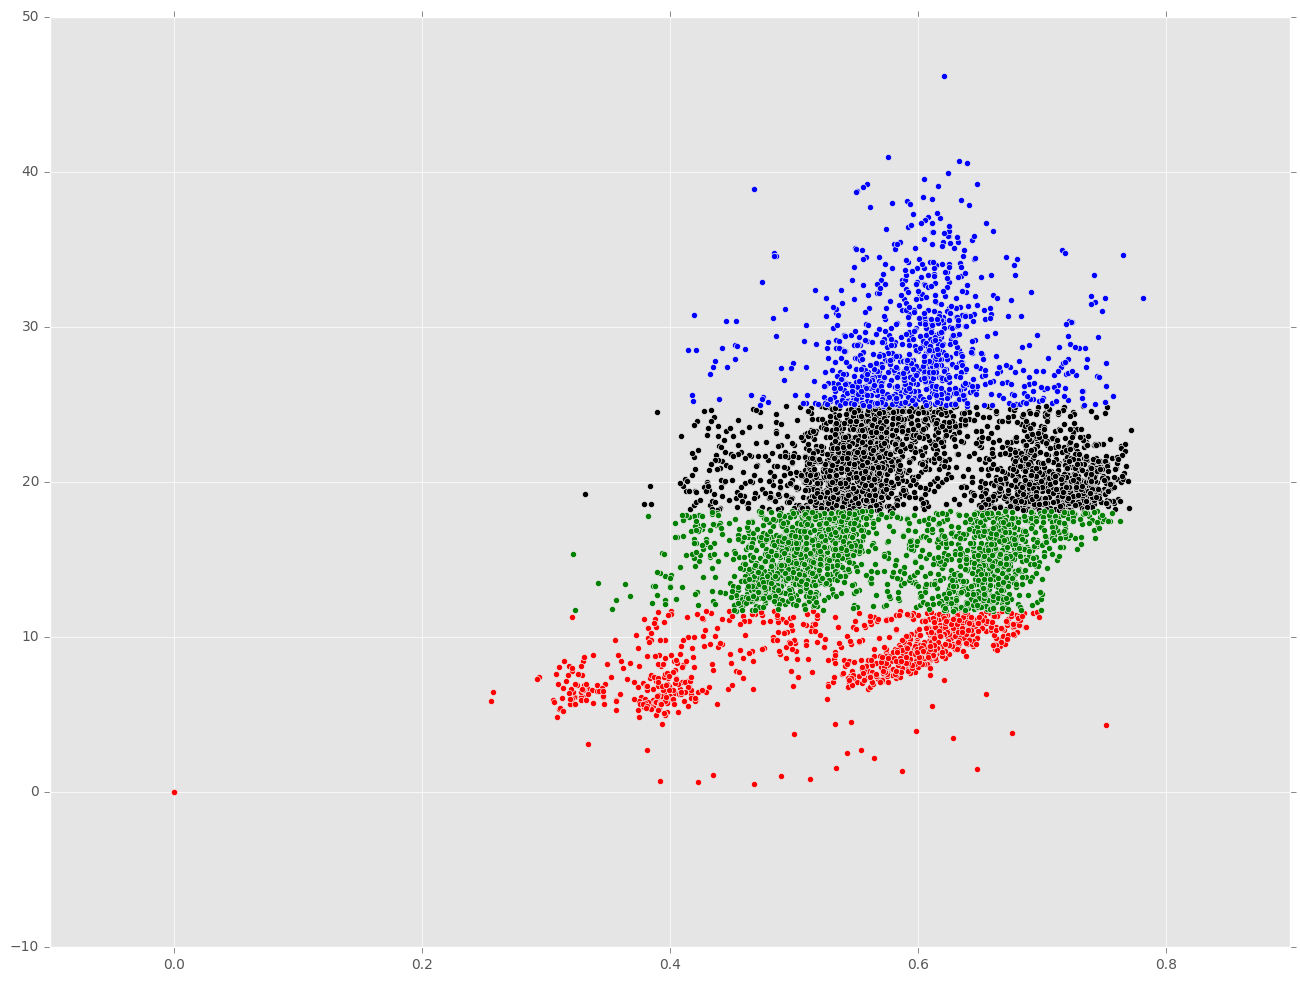

In [41]:
dx = []
# d0 = data[data['km'] == 0]
# d1 = data[data['km'] == 1]
# d2 = data[data['km'] == 2]
for n in range(n_clusters):
    dx.append(data[data['km'] == n])

for n in range(n_clusters):
    plt.scatter(dx[n]['hurst'], dx[n]['chanstd'], c=colors[n])
# plt.scatter(d1['hurst'], d1['chanstd'], c='r')
# plt.scatter(d2['hurst'], d2['chanstd'], c='c')

In [42]:
data_t1 = pd.read_csv('/home/mike/Downloads/train_1/submit_1478483889.61.csv')
data_t1[['hurst', 'chanstd']] = normalize(data_t1[['hurst', 'chanstd']] ,axis=0)
data_t3 = pd.read_csv('/home/mike/Downloads/train_1/submit_1478483889.61.csv')
data_t3[['hurst', 'chanstd']] = normalize(data_t1[['hurst', 'chanstd']] ,axis=0)

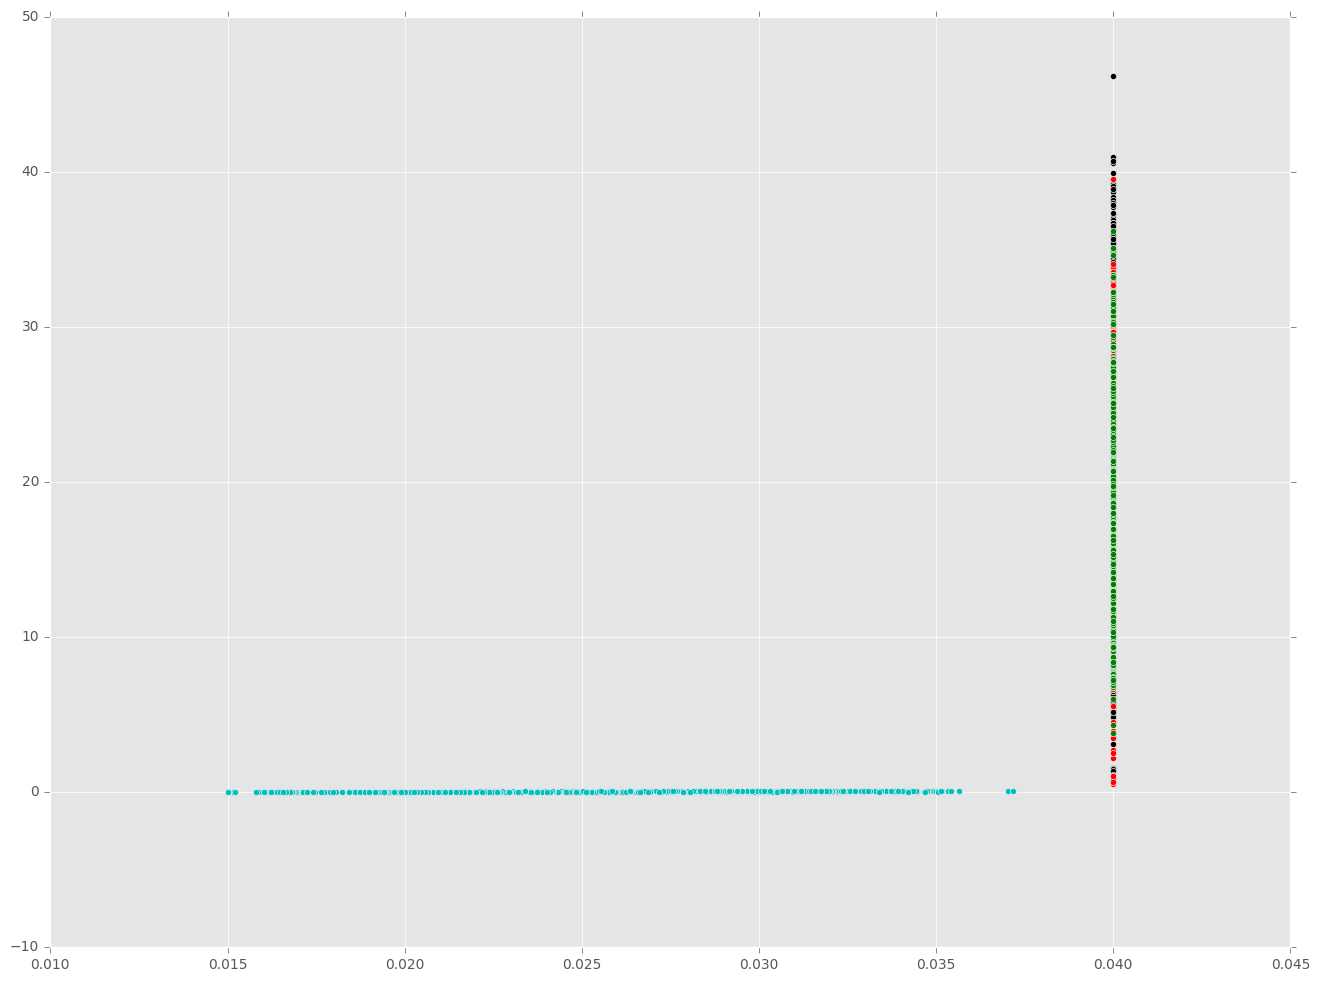

In [43]:
dx = []
for n in range(0,4):
    dx.append(data[data['set'] == n])
    plt.scatter(np.clip(dx[n]['hurst'],.015,.04), dx[n]['chanstd'], c=colors[n-1])
    
plt.scatter(np.clip(data_t1['hurst'], 0.015, 0.04), data_t1['chanstd'], c='c')

In [44]:
nfile = 120
d0 = dataio.get_matlab_eeg_data_ary(sources0[nfile])
d1 = dataio.get_matlab_eeg_data_ary(sources1[100])
matplotlib.rcParams['figure.figsize'] = slong

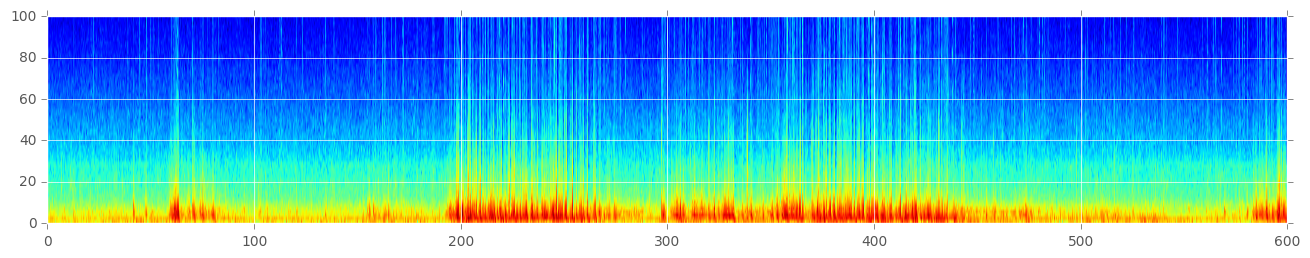

In [45]:
# plt.plot(d1)
spec0 = spectral.file_to_fig(sources0[nfile], returnspec=1)

eegkaggle/vectorizers/spectral.py:79: RuntimeWarning: divide by zero encountered in log
  spec_ary = np.log(np.abs(spec_ary))
/home/mike/venvs/ml/ml/local/lib/python2.7/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


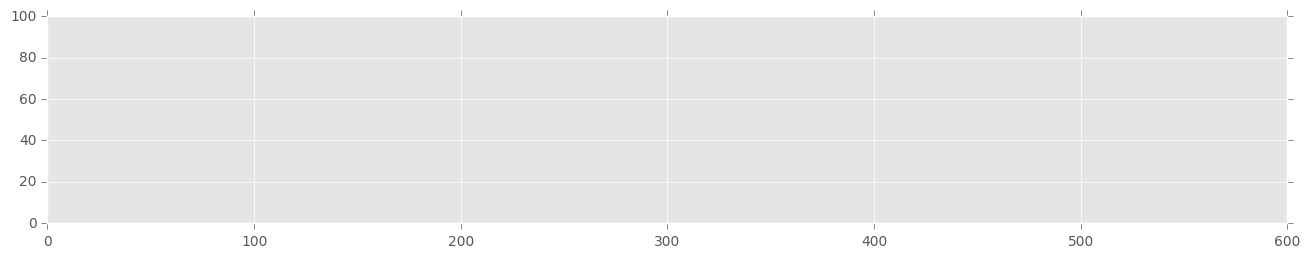

In [46]:
spec1 = spectral.file_to_fig(sources1[nfile], returnspec=1)

In [47]:
spec0.shape

(3750, 64, 16)

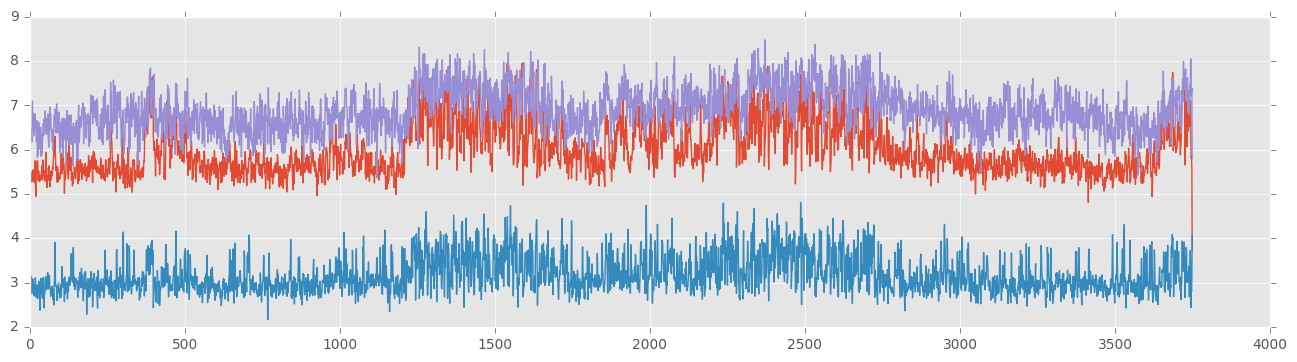

In [48]:
plt.plot(np.average(spec0[:,6], axis=1))
plt.plot(np.average(spec0[:,60], axis=1))
plt.plot(np.average(spec0[:,0], axis=1))

(4, 6)

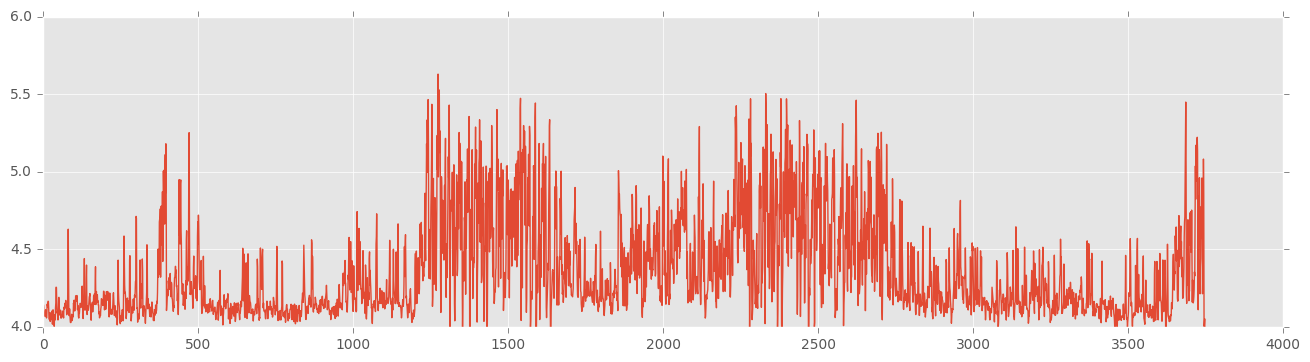

In [49]:
spikesig = np.average(np.average(spec0, axis=2), axis=1)
plt.plot(spikesig)
plt.ylim(4,6)
# plt.plot(np.average(d0, axis=1)[::64])

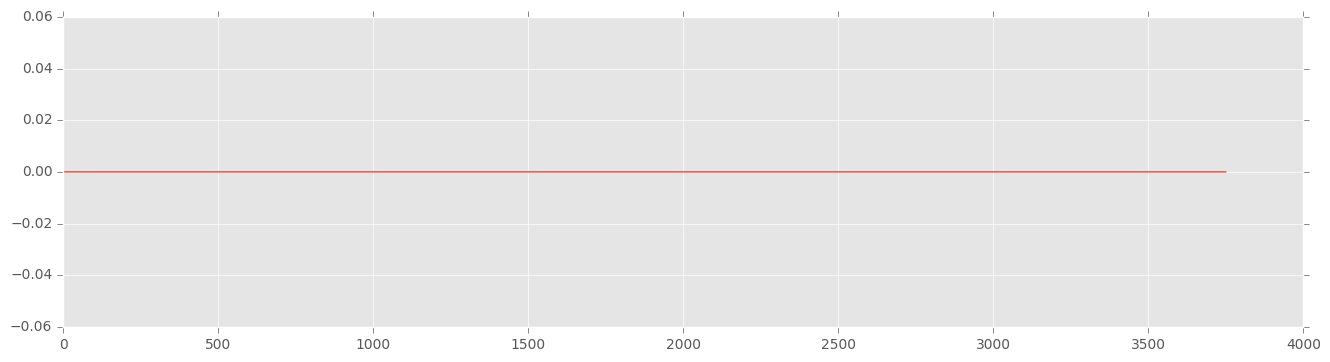

In [50]:
plt.plot(np.average(np.average(spec1, axis=2), axis=1)>4.25)
# plt.ylim(4,6)

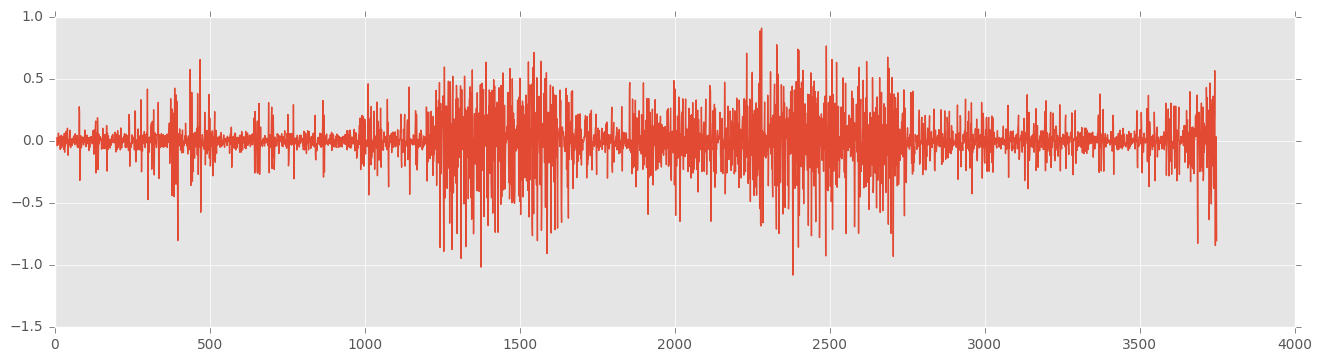

In [51]:
plt.plot(np.diff(spikesig))